In [43]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator

In [44]:
import NNMFit
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig


In [45]:
config_hdl = AnalysisConfig.from_configs(
        main_config_file="/data/user/tvaneede/GlobalFit/analysis/toy_km3net/configs/main_SPL.cfg",
        analysis_config_file = "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/configs/analysis_configs/asimov_SPL_icecube_km3net.yaml",
        override_config_files=None,
        override_dict=None,
        config_dir="/data/user/tvaneede/GlobalFit/analysis/toy_km3net/configs",
        override_components_files=None,
        override_parameters_files=None)

In [46]:
# build a histogram
hist_graph_hdl = HistogramGraph(config_hdl)

/mnt/ceph1-npx/user/tvaneede/software/NNMFit/NNMFit/core/analysis_config.py:719: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/NNMFit/NNMFit/core/analysis_config.py:719: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/NNMFit/NNMFit/core/analysis_config.py:719: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(
/mnt/ceph1-npx/user/tvaneede/software/NNMFit/NNMFit/core/analysis_config.py:719: DeprecationWarning: Old binning range format used. Please update you detector config.View the documentation for more information
  warnings.warn(


In [47]:
input_params = {
    # astro flux: default (generic) SPL
    'astro_norm': 1.36,
    'gamma_astro': 2.37,
}

In [39]:
# Apply the custom style
plt.style.use('/data/user/tvaneede/plotting_style/km3net.mplstyle')

In [48]:
# get binning for icecube
det_config = "IC86_pass2_SnowStorm_example_tracks"

res = hist_graph_hdl.get_evaled_histogram(
    input_variables=input_params, det_config=det_config, reshape=True
)

temp = hist_graph_hdl.get_binning(det_config=det_config)
bins_energy = temp["reco_energy"]
bins_zenith = temp["reco_zenith"]

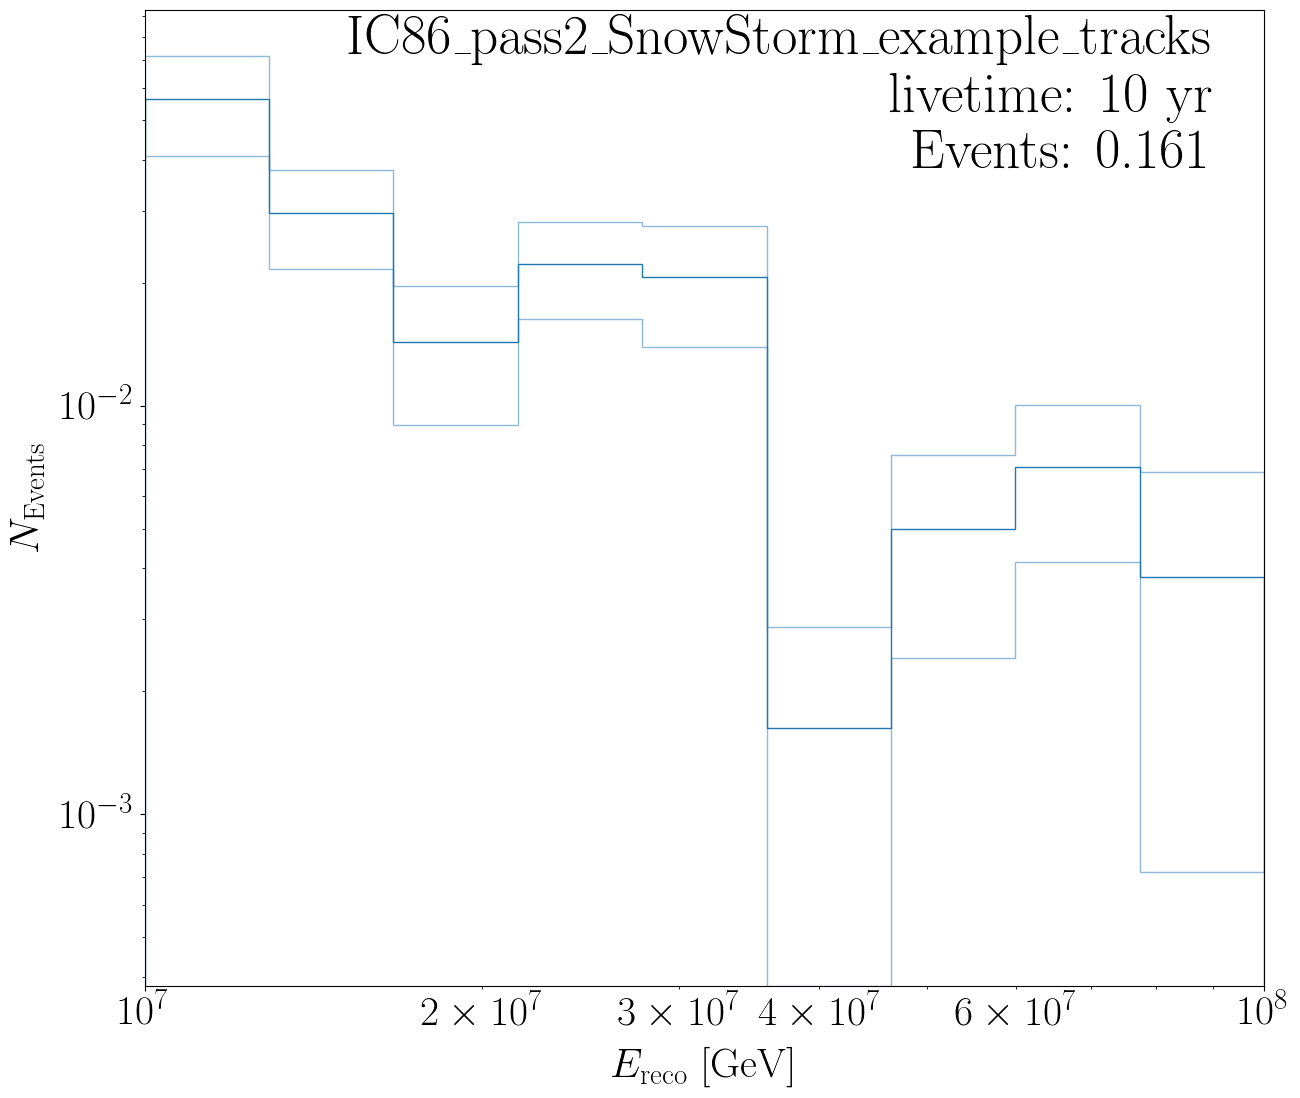

In [49]:
# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

# energy: axis=1
hist = res["mu"].sum(axis=1)
yerror = np.sqrt(res["ssq"].sum(axis=1))

ax1.stairs(values=hist, edges=bins_energy, color="C0")
ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color="C0")

# # the he event
# ax1.plot([6e7,6e7],[0, 2*max(hist)], color="black")
# ax1.plot([11e7,11e7],[0, 2*max(hist)], color="black")
# ax1.plot([32e7,32e7],[0, 2*max(hist)], color="black")

# some text
plt.text(0.9e8, 3.8e-2, f"{det_config}\nlivetime: 10 yr\nEvents: {sum(hist):.3f}",
         horizontalalignment='right',)



# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()

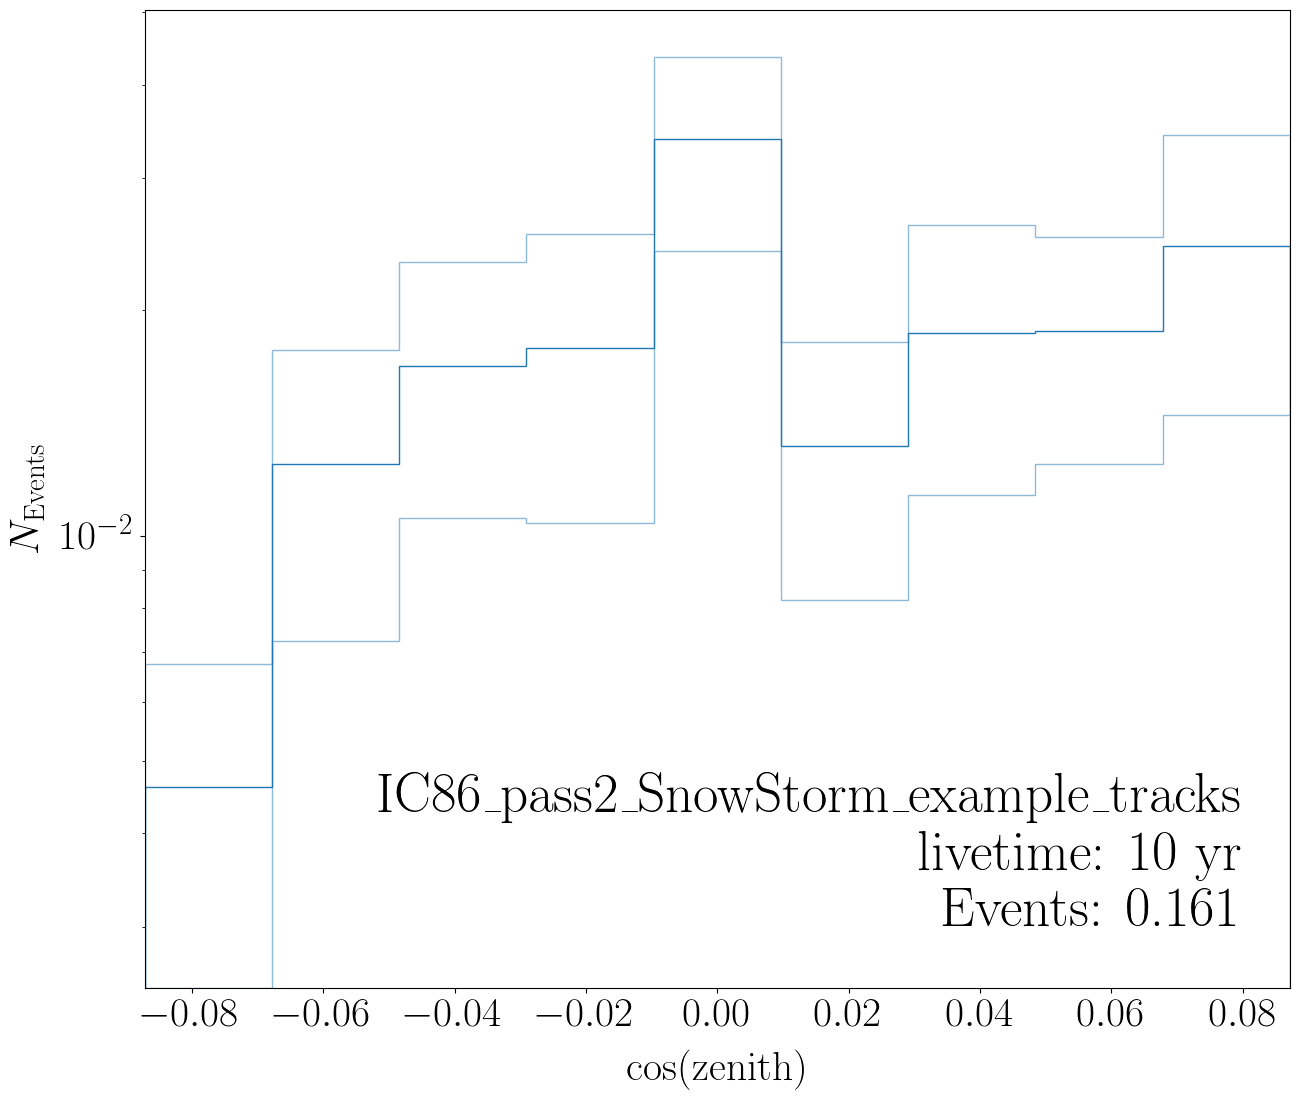

In [40]:
# zenith

# new figure
fig, (ax1) = plt.subplots(1, 1)

# zenith: axis=0
hist = res["mu"].sum(axis=0)
yerror = np.sqrt(res["ssq"].sum(axis=0))

ax1.stairs(values=hist, edges=np.cos(bins_zenith), color="C0")
ax1.stairs(values=hist+yerror, edges=np.cos(bins_zenith), baseline=hist-yerror, alpha=0.5, color="C0")

# some text
plt.text(0.08, 3e-3, f"IC86_pass2_SnowStorm_example_tracks\nlivetime: 10 yr\nEvents: {sum(hist):.3f}",
         horizontalalignment='right',)

# setup figure
ax1.set_xlabel("cos(zenith)")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_yscale("log")
ax1.set_xlim(np.cos(bins_zenith)[-1], np.cos(bins_zenith)[0])
fig.tight_layout()

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/coszen_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

plt.show()

In [ ]:
# get binning for arca
det_config = "arca230_numu_hori_20PeV"

res = hist_graph_hdl.get_evaled_histogram(
    input_variables=input_params, det_config=det_config, reshape=True
)

temp = hist_graph_hdl.get_binning(det_config=det_config)
bins_energy = temp["reco_energy"]
bins_zenith = temp["reco_zenith"]

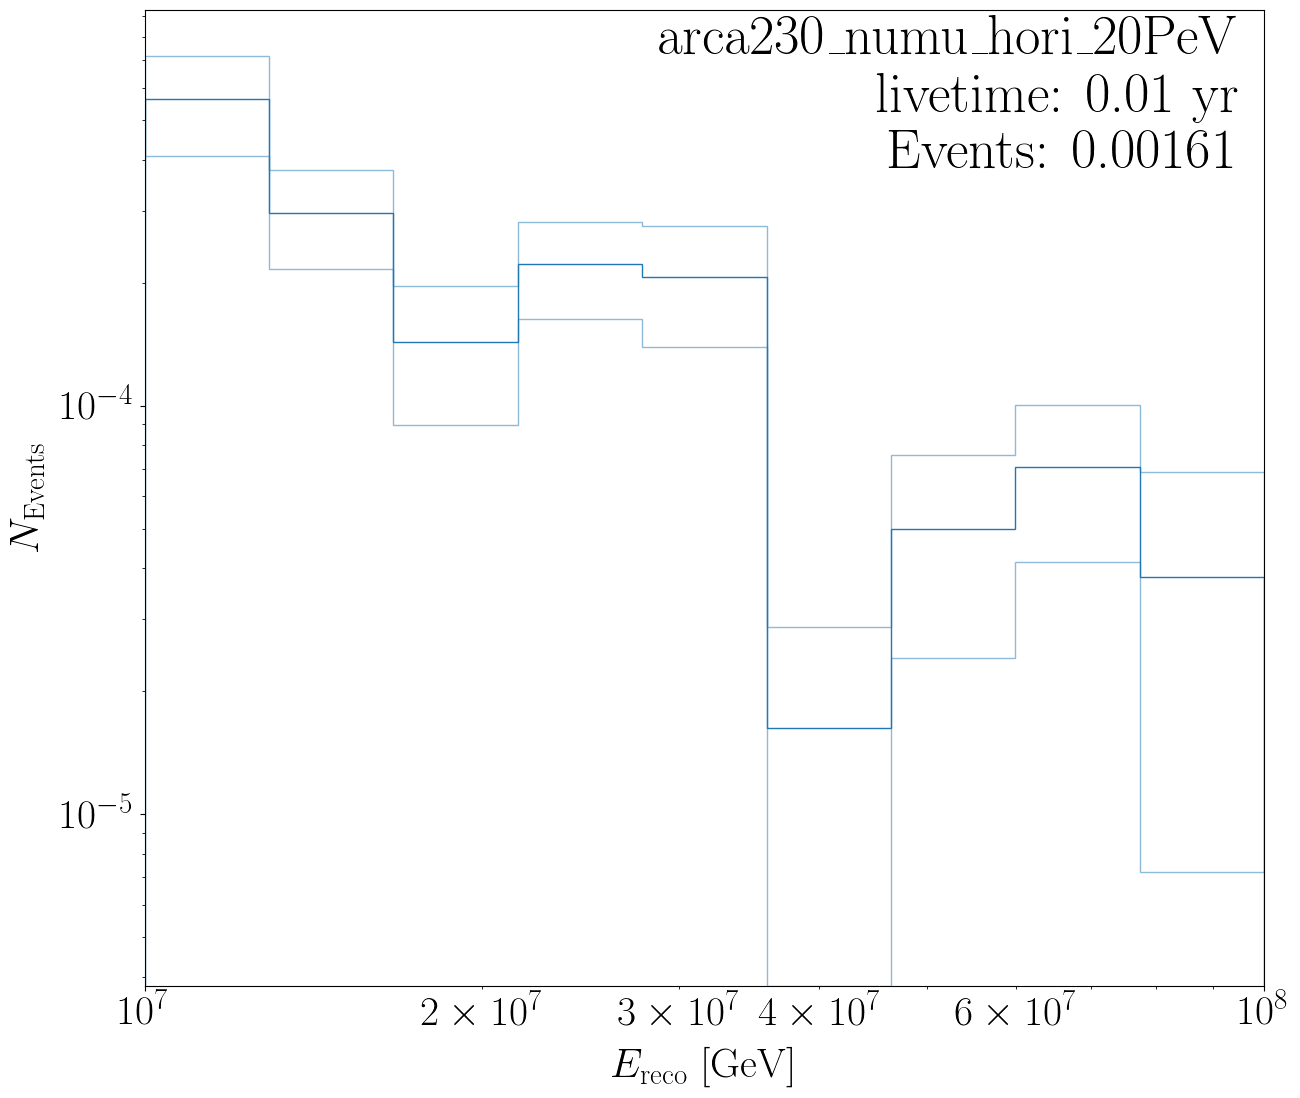

In [48]:
# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

# energy: axis=1
hist = res["mu"].sum(axis=1)
yerror = np.sqrt(res["ssq"].sum(axis=1))

ax1.stairs(values=hist, edges=bins_energy, color="C0")
ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color="C0")

# some text
plt.text(0.95e8, 3.8e-4, f"{det_config}\nlivetime: 0.01 yr\nEvents: {sum(hist):.5f}", horizontalalignment='right',)

# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()

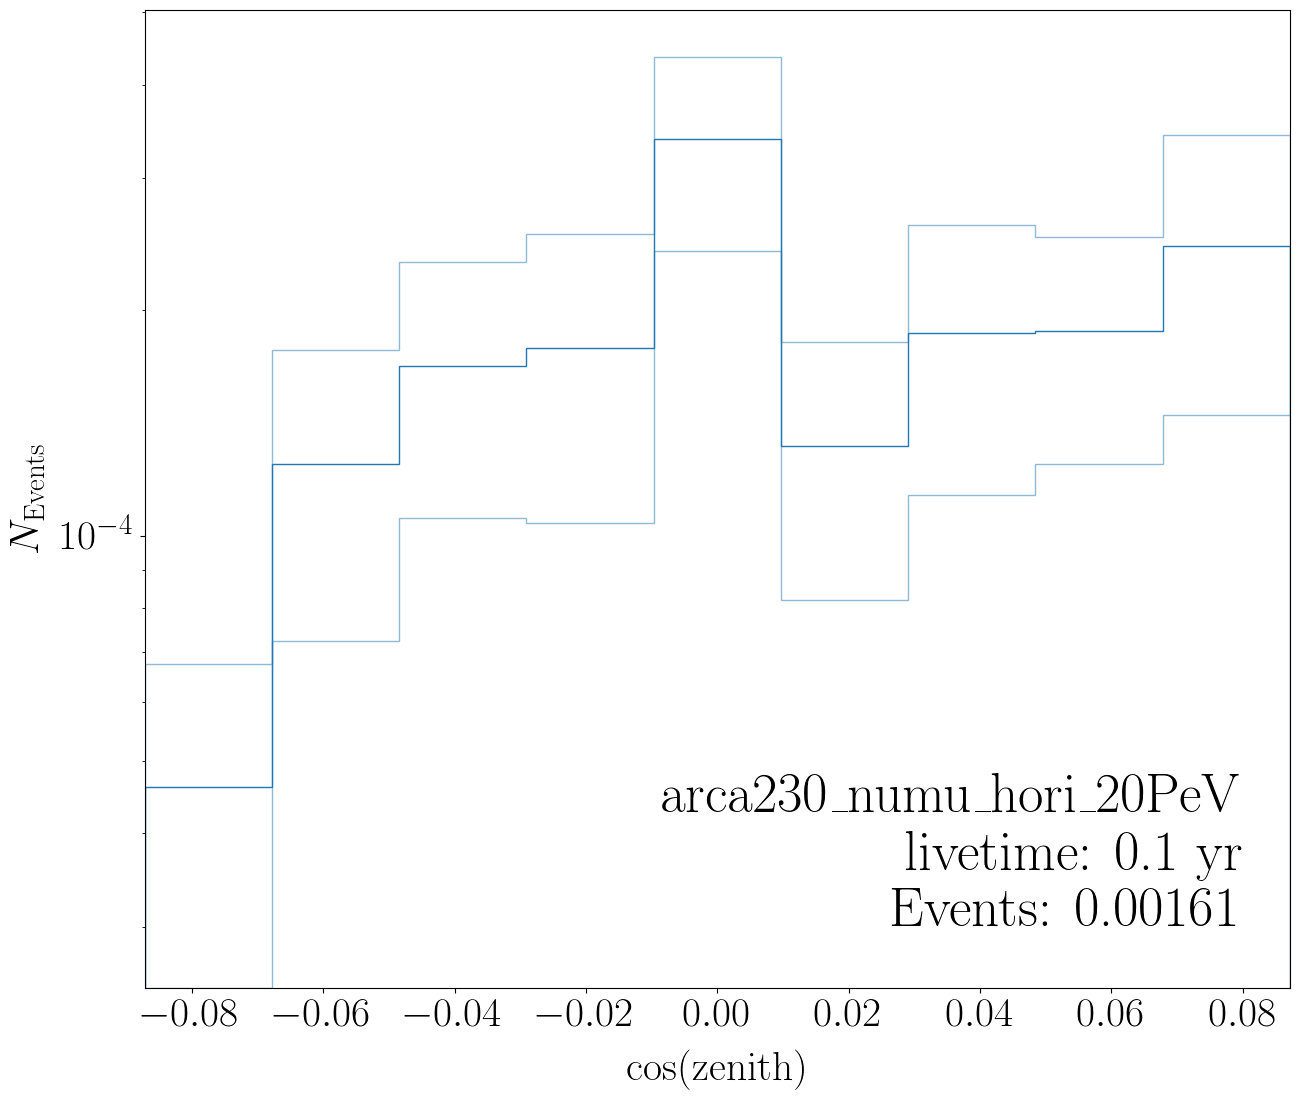

In [ ]:
# new figure
fig, (ax1) = plt.subplots(1, 1)

# zenith: axis=0
hist = res["mu"].sum(axis=0)
yerror = np.sqrt(res["ssq"].sum(axis=0))

ax1.stairs(values=hist, edges=np.cos(bins_zenith), color="C0")
ax1.stairs(values=hist+yerror, edges=np.cos(bins_zenith), baseline=hist-yerror, alpha=0.5, color="C0")

plt.text(0.08, 3e-5, f"{det_config}\nlivetime: 0.1 yr\nEvents: {sum(hist):.5f}",
         horizontalalignment='right',)

# setup figure
ax1.set_xlabel("cos(zenith)")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_yscale("log")
ax1.set_xlim(np.cos(bins_zenith)[-1], np.cos(bins_zenith)[0])
fig.tight_layout()

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/coszen_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

plt.show()

In [53]:
input_params = {
    # astro flux: default (generic) SPL
    'astro_norm': 0.077,
    'gamma_astro': 1.54,
}

In [54]:
# get binning for icecube
det_config = "IC86_pass2_SnowStorm_example_tracks"

res = hist_graph_hdl.get_evaled_histogram(
    input_variables=input_params, det_config=det_config, reshape=True
)

temp = hist_graph_hdl.get_binning(det_config=det_config)
bins_energy = temp["reco_energy"]
bins_zenith = temp["reco_zenith"]

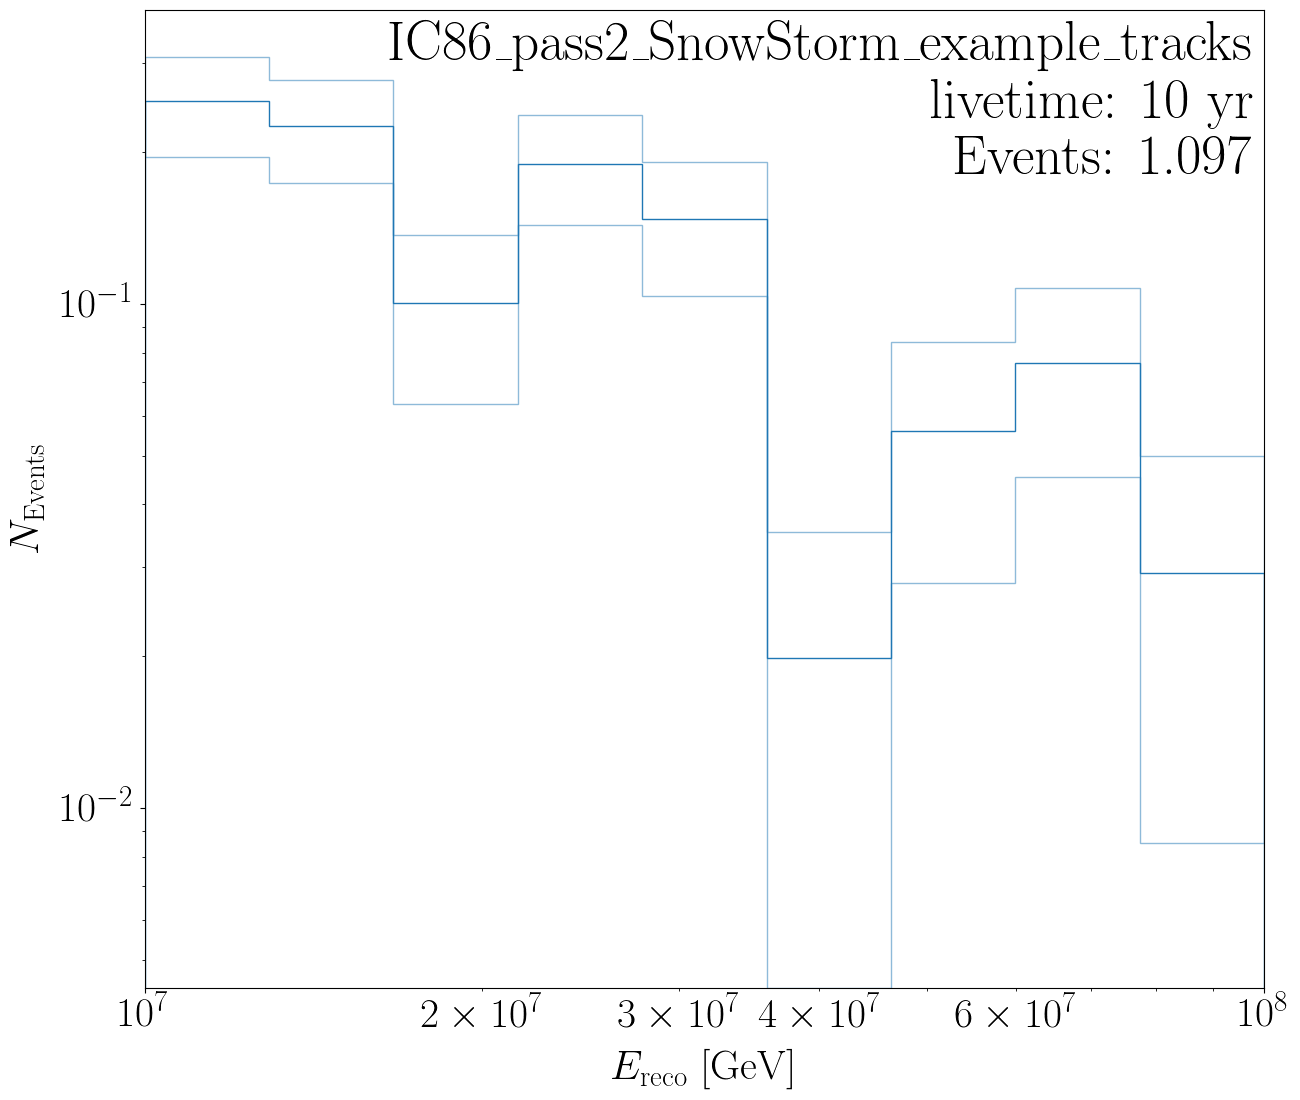

In [62]:
# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

# energy: axis=1
hist = res["mu"].sum(axis=1)
yerror = np.sqrt(res["ssq"].sum(axis=1))

ax1.stairs(values=hist, edges=bins_energy, color="C0")
ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color="C0")

# some text
plt.text(0.98e8, 1.8e-1, f"{det_config}\nlivetime: 10 yr\nEvents: {sum(hist):.3f}",
         horizontalalignment='right',)

# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()

In [63]:
# get binning for arca
det_config = "arca230_numu_hori_20PeV"

res = hist_graph_hdl.get_evaled_histogram(
    input_variables=input_params, det_config=det_config, reshape=True
)

temp = hist_graph_hdl.get_binning(det_config=det_config)
bins_energy = temp["reco_energy"]
bins_zenith = temp["reco_zenith"]

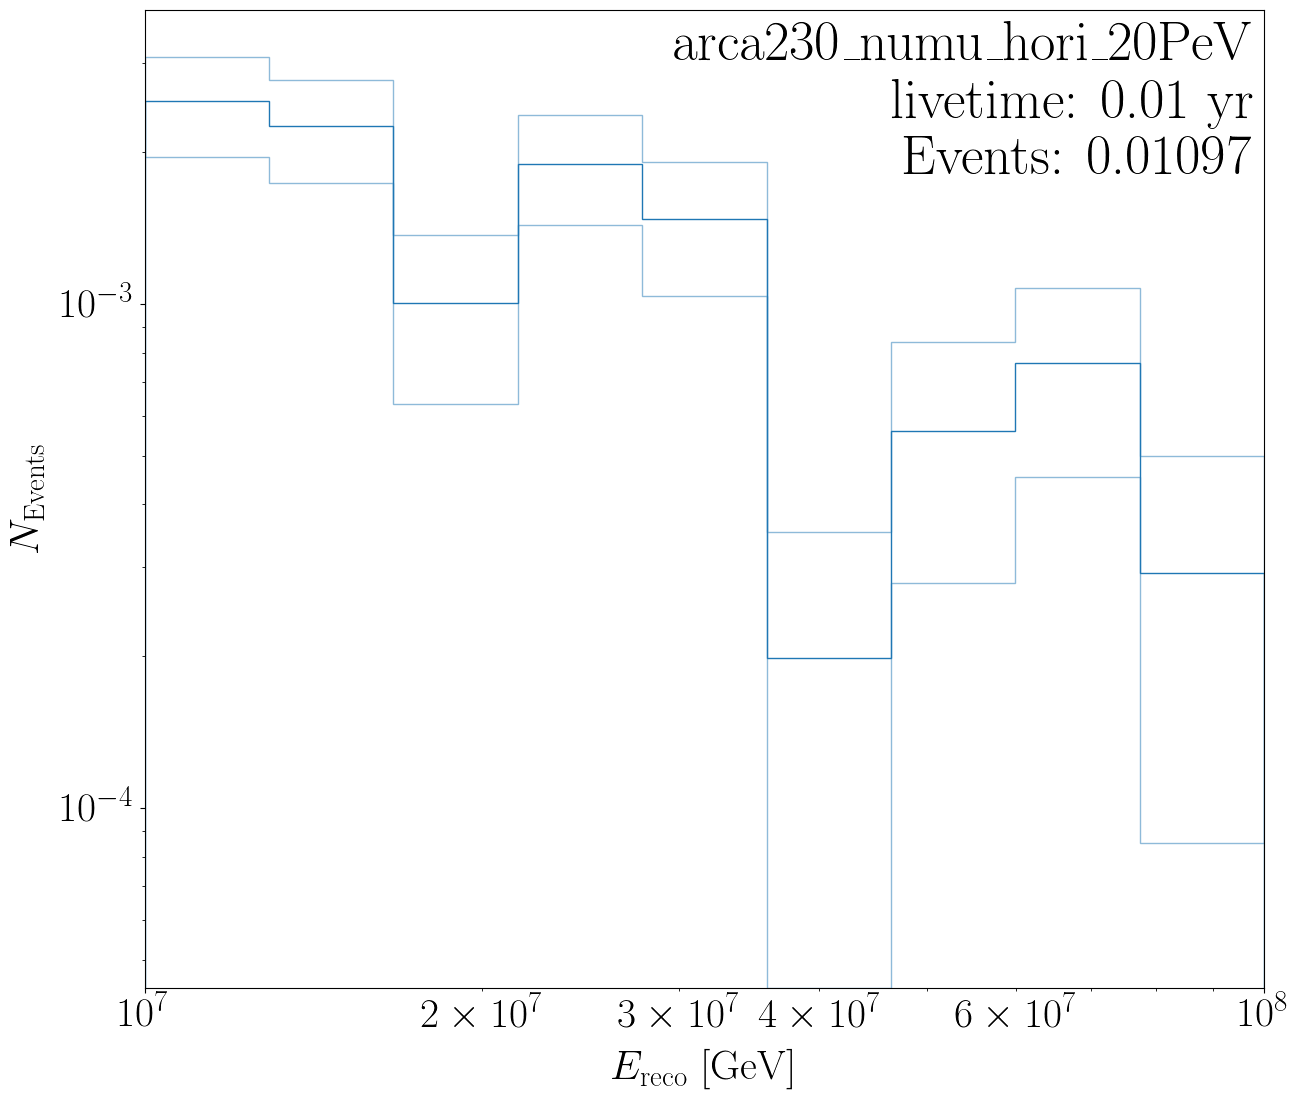

In [65]:
# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

# energy: axis=1
hist = res["mu"].sum(axis=1)
yerror = np.sqrt(res["ssq"].sum(axis=1))

ax1.stairs(values=hist, edges=bins_energy, color="C0")
ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color="C0")

# some text
plt.text(0.98e8, 1.8e-3, f"{det_config}\nlivetime: 0.01 yr\nEvents: {sum(hist):.5f}", horizontalalignment='right',)

# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/make_histogram/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()